In [190]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm

In [191]:
iris_data = load_iris()

# cleans names by removing units and replacing space
cleanName = lambda x: x.strip(" (cm)").replace(" ", "_")

iris_df = pd.DataFrame({cleanName(iris_data.feature_names[0]):iris_data.data[:,0],
                        cleanName(iris_data.feature_names[1]):iris_data.data[:,1],
                        cleanName(iris_data.feature_names[2]):iris_data.data[:,2],
                        cleanName(iris_data.feature_names[3]):iris_data.data[:,3],
                        "species":iris_data.target
                       })

speciesMap = dict(zip([0,1,2,3], iris_data.target_names))

del iris_data

In [192]:
iris_df.sample(5)

,petal_length,petal_width,sepal_length,sepal_width,species
140,5.6,2.4,6.7,3.1,2
51,4.5,1.5,6.4,3.2,1
34,1.5,0.1,4.9,3.1,0
114,5.1,2.4,5.8,2.8,2
102,5.9,2.1,7.1,3.0,2


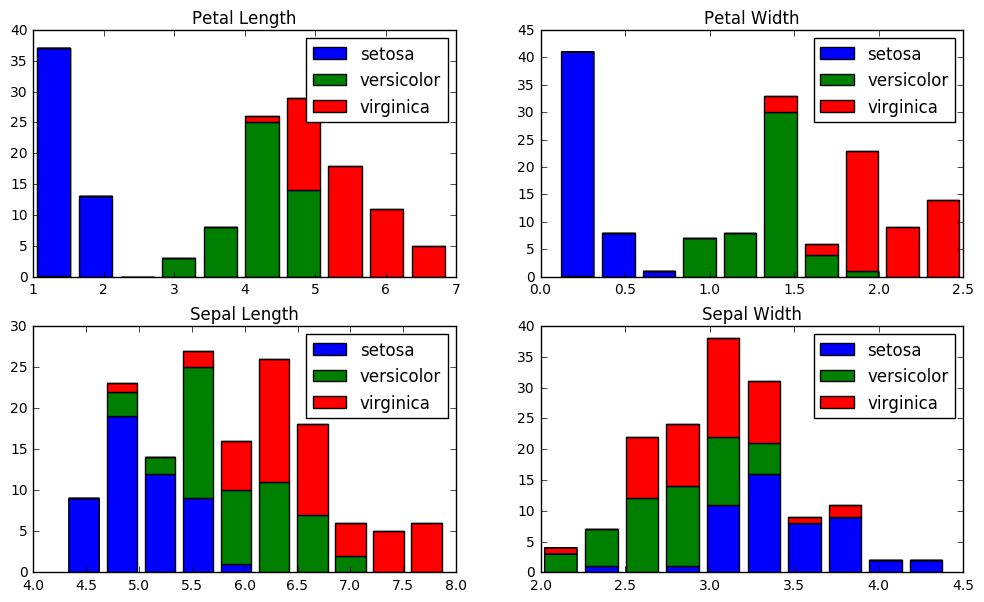

In [193]:
plt.close(0)
plt.figure(0, figsize=[12,7])
plt.subplot(2,2,1)
plt.hist([iris_df[iris_df.species==0].petal_length,
          iris_df[iris_df.species==1].petal_length,
          iris_df[iris_df.species==2].petal_length,
          iris_df[iris_df.species==3].petal_length], 
         stacked=True,
         label=speciesMap.values()
        )
plt.title("Petal Length")
plt.legend()

plt.subplot(2,2,2)
plt.hist([iris_df[iris_df.species==0].petal_width,
          iris_df[iris_df.species==1].petal_width,
          iris_df[iris_df.species==2].petal_width,
          iris_df[iris_df.species==3].petal_width], 
         stacked=True,
         label=speciesMap.values()
        )
plt.title("Petal Width")
plt.legend()

plt.subplot(2,2,3)
plt.hist([iris_df[iris_df.species==0].sepal_length,
          iris_df[iris_df.species==1].sepal_length,
          iris_df[iris_df.species==2].sepal_length,
          iris_df[iris_df.species==3].sepal_length], 
         stacked=True,
         label=speciesMap.values()
        )
plt.title("Sepal Length")
plt.legend()

plt.subplot(2,2,4)
plt.hist([iris_df[iris_df.species==0].sepal_width,
          iris_df[iris_df.species==1].sepal_width,
          iris_df[iris_df.species==2].sepal_width,
          iris_df[iris_df.species==3].sepal_width], 
         stacked=True,
         label=speciesMap.values()
        )
plt.title("Sepal Width")
plt.legend()

plt.show()

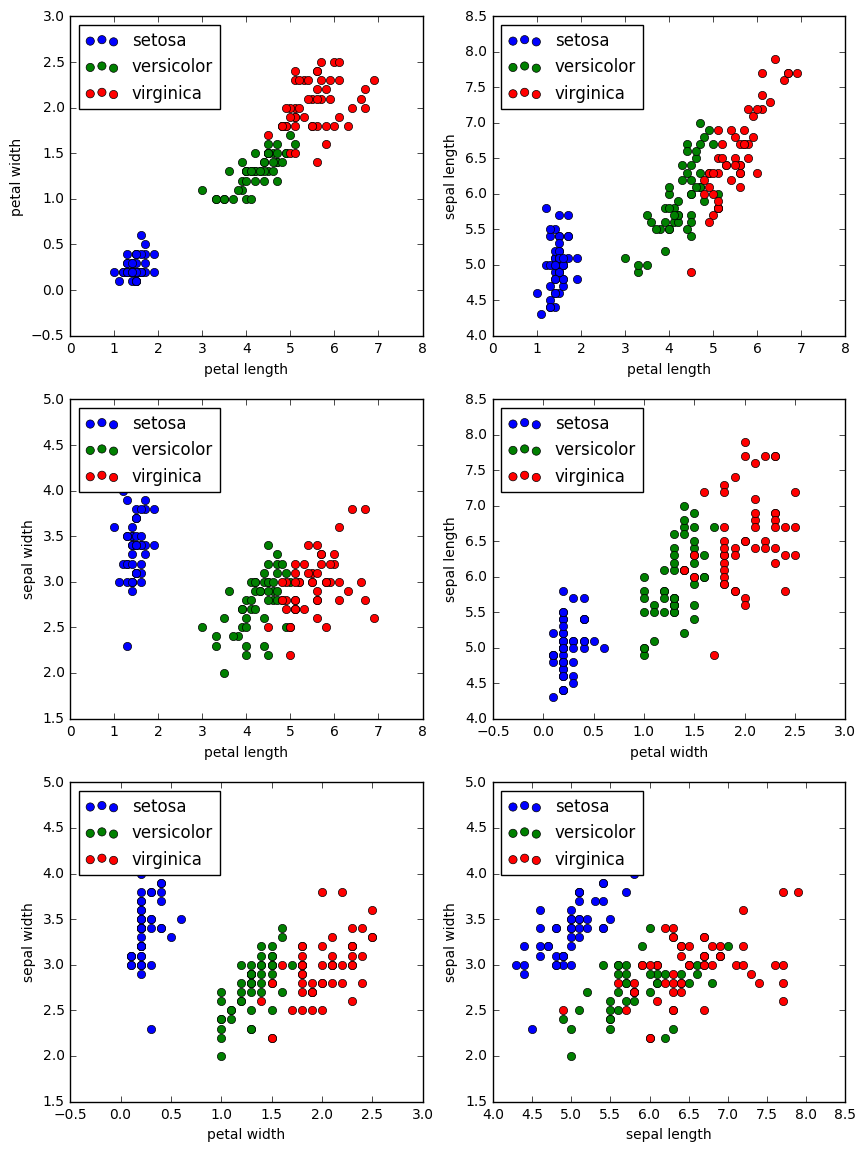

In [194]:
colorMap = {0:"b", 1:"g", 2:"r"}

def plotTwo(feature1, feature2, data):
    i=0
    p = plt.scatter(x=data[data.species==i][feature1], y=data[data.species==i][feature2],
                c=colorMap[i], lw=0.5, s=35, label = speciesMap[i])
    
    i=1
    plt.scatter(x=data[data.species==i][feature1], y=data[data.species==i][feature2],
                c=colorMap[i], lw=0.5, s=35, label = speciesMap[i])
    
    i=2
    plt.scatter(x=data[data.species==i][feature1], y=data[data.species==i][feature2],
                c=colorMap[i], lw=0.5, s=35, label = speciesMap[i])

    plt.xlabel(feature1.replace("_"," "))
    plt.ylabel(feature2.replace("_"," "))
    plt.legend(loc="upper left")
    return p
    
plt.figure(1, figsize=[10,14]) 
plt.subplot(3,2,1)
plotTwo("petal_length", "petal_width", data=iris_df)

plt.figure(1); plt.subplot(3,2,2)
plotTwo("petal_length", "sepal_length", data=iris_df)

plt.figure(1); plt.subplot(3,2,3)
plotTwo("petal_length", "sepal_width", data=iris_df)

plt.figure(1); plt.subplot(3,2,4)
plotTwo("petal_width", "sepal_length", data=iris_df)

plt.figure(1); plt.subplot(3,2,5)
plotTwo("petal_width", "sepal_width", data=iris_df)


plt.figure(1); plt.subplot(3,2,6)
plotTwo("sepal_length", "sepal_width", data=iris_df)
plt.show()


In [195]:
X = iris_df[["petal_length", "petal_width", "sepal_length", "sepal_width"]].values
y = iris_df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [196]:
tree_classifier = tree.DecisionTreeClassifier(criterion="gini")

tree_classifier.fit(X_train, y_train)

tree_classifier.score(X_test,y_test)

0.93999999999999995

In [197]:
importance = tree_classifier.feature_importances_

print("""Feature Importance (Higher is better): 
  {}:\t{}
  {}:\t{}
  {}:\t{}
  {}:\t{}
""".format(iris_df.columns[0], importance[0],
           iris_df.columns[1], importance[1],
           iris_df.columns[2], importance[2],
           iris_df.columns[3], importance[3]))

Feature Importance (Higher is better): 
  petal_length:	0.5473207387466068
  petal_width:	0.43010929435601125
  sepal_length:	0.022569966897381877
  sepal_width:	0.0



In [198]:
from sklearn.svm import SVC

linear_svm = SVC(kernel="linear")

linear_svm.fit(X_train, y_train)

linear_svm.score(X_test, y_test)

0.95999999999999996

In [199]:
rbf_svm = SVC(kernel="rbf")

rbf_svm.fit(X_train, y_train)

rbf_svm.score(X_test, y_test)

0.95999999999999996

In [200]:
print("""Accuracy on test set
Linear SVM:\t{}
Radial SVM:\t{}
Decision Tree:\t{}
""".format(linear_svm.score(X_test, y_test),
           rbf_svm.score(X_test, y_test),
           tree_classifier.score(X_test,y_test)))

Accuracy on test set
Linear SVM:	0.96
Radial SVM:	0.96
Decision Tree:	0.94



In [201]:
scores = pd.DataFrame({"linear_svm":[],
                       "radial_svm":[],
                       "decision_tree":[]
                      })
for i in range(5000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linear_svm_score = SVC(kernel="linear") \
      .fit(X_train, y_train) \
      .score(X_test, y_test)
    radial_svm_score = SVC(kernel="rbf") \
      .fit(X_train, y_train) \
      .score(X_test, y_test)
    tree_score = tree.DecisionTreeClassifier(criterion="gini") \
      .fit(X_train, y_train) \
      .score(X_test,y_test)
    
    single_score = pd.DataFrame({"linear_svm":[linear_svm_score],
                       "radial_svm":[radial_svm_score],
                       "decision_tree":[tree_score] })
    scores = scores.append(single_score, ignore_index=True)

In [202]:
scores["best"] = scores.apply(lambda row: row.argmax(), axis=1)

In [203]:
scores.groupby("best").count().decision_tree/scores.shape[0]*100

best
decision_tree    18.02
linear_svm       67.96
radial_svm       14.02
Name: decision_tree, dtype: float64